# Plot motifs

This file plot univariant and multivariant motifs, calculated by matrix profile.

**Import Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
from kando import kando_client
import datetime

%run utils.ipynb

**Global Variables**

In [2]:
RESAMPLE = '5min'
WINDOW = 24
THRESHOLD = 0.05
NODE = 2045
START = datetime.datetime(2020, 1, 1, 0, 0).timestamp()

**Connect to API**

In [3]:
client = connect()

**Load data**

In [4]:
df_Train = client.get_all(point_id=NODE, start=START)

Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1577829600.0&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1585694100&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1593317100&end=&raw_data=
Kando - GET /api/data/fetch?point_id=2045&unit_id=&start=1593918000&end=&raw_data=


**Create DataFrame**

In [5]:
df = create_df(df_Train)
df.head()

PI     EC     PH  ORP  TEMPERATURE  Battery  Signal  \
DateTime                                                                       
2019-12-31 22:10:00  32.903  664.0  6.023 -186         20.3      0.0     0.0   
2019-12-31 22:15:00  32.903  664.0  6.023 -187         20.4      0.0     0.0   
2019-12-31 22:20:00  32.391  664.0  6.055 -187         20.4      0.0     0.0   
2019-12-31 22:25:00  32.103  664.0  6.073 -188         20.4      0.0     0.0   
2019-12-31 22:30:00  32.023  664.0  6.078 -187         20.4      0.0     0.0   

                     visit  
DateTime                    
2019-12-31 22:10:00  False  
2019-12-31 22:15:00  False  
2019-12-31 22:20:00  False  
2019-12-31 22:25:00  False  
2019-12-31 22:30:00  False

**Relevant features**

In [6]:
cols_to_plot = ['PI', 'EC', 'PH', 'ORP', 'TEMPERATURE']

**Plotting on a full time-line (with optional resampling)**

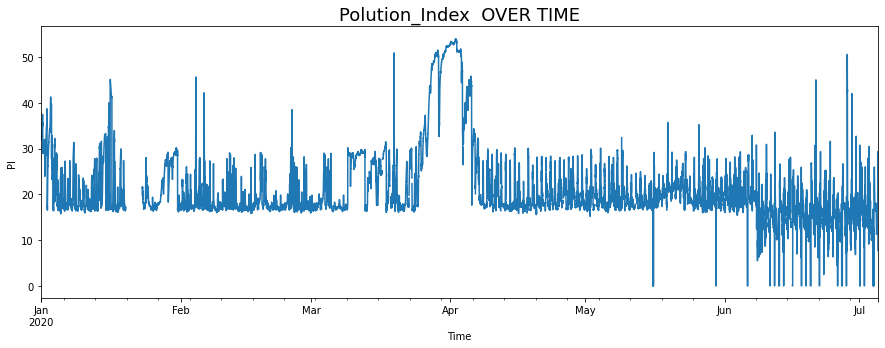

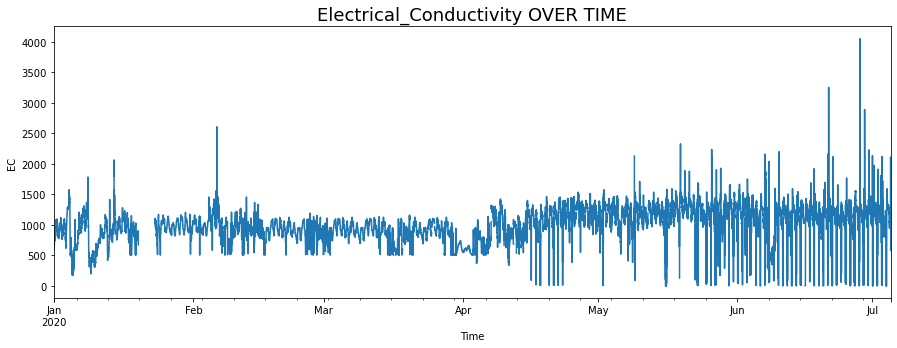

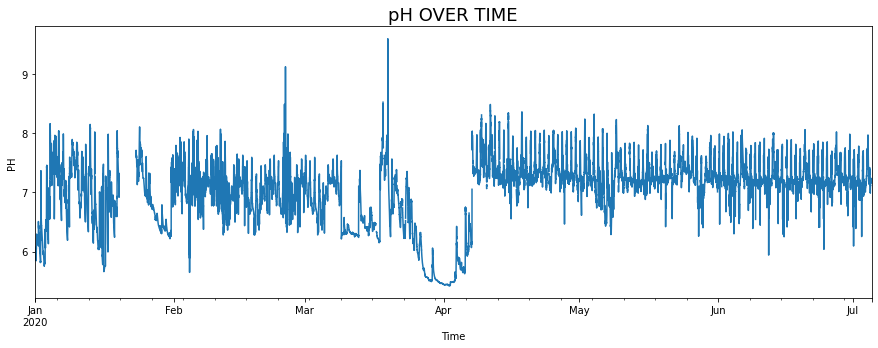

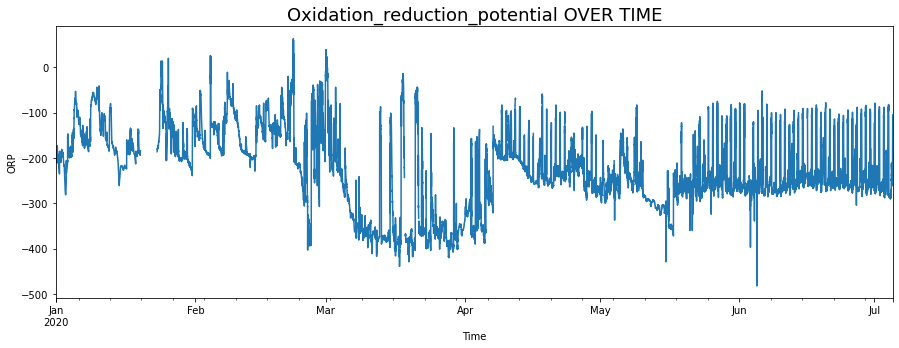

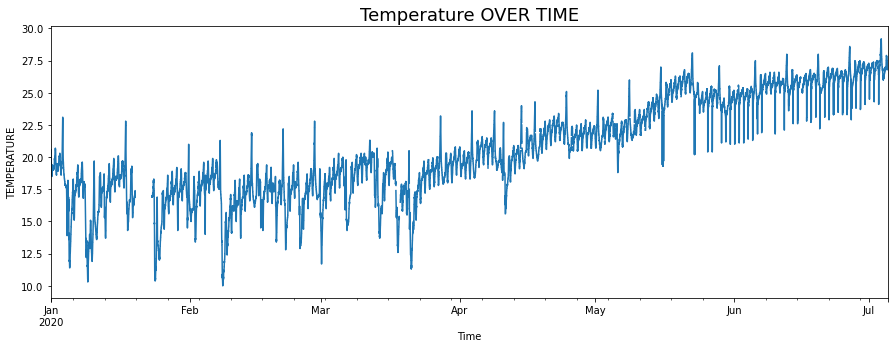

In [7]:
plot_columns(df, cols_to_plot, RESAMPLE)

**Resampling the data, imputing nulls with time_interpolations and plotting**

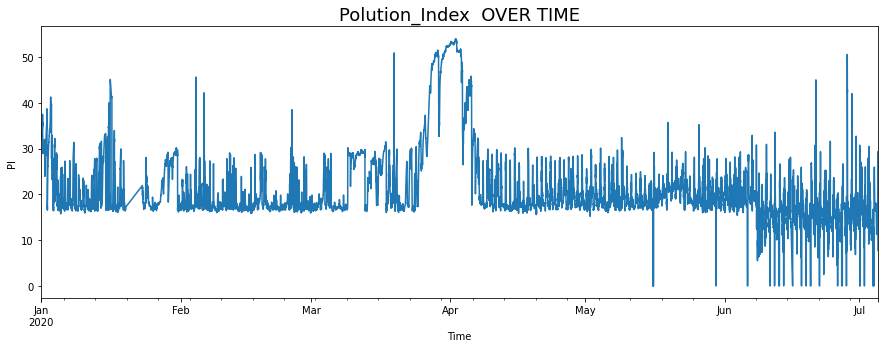

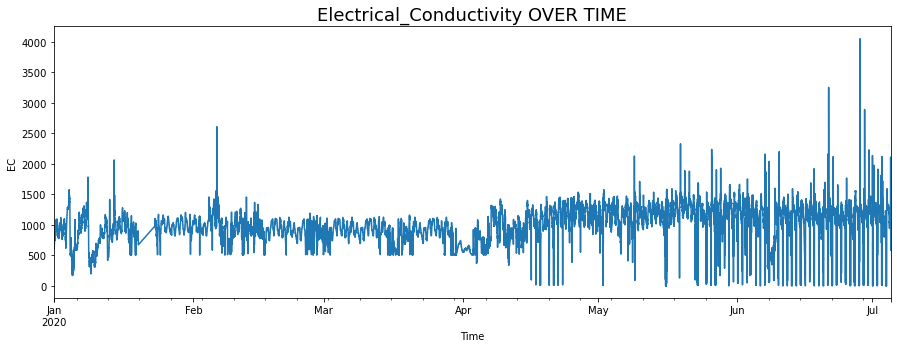

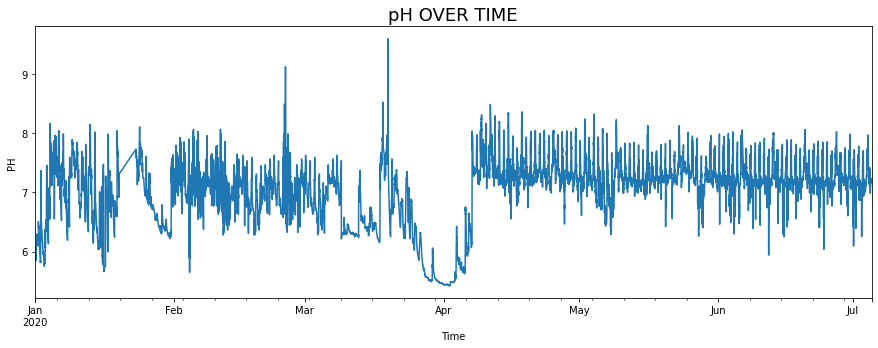

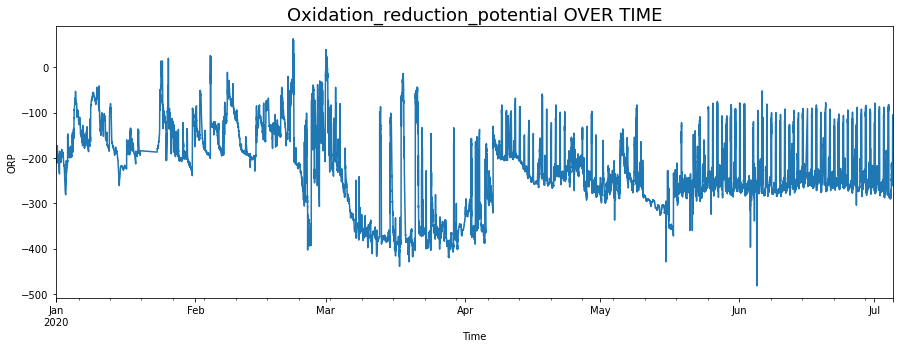

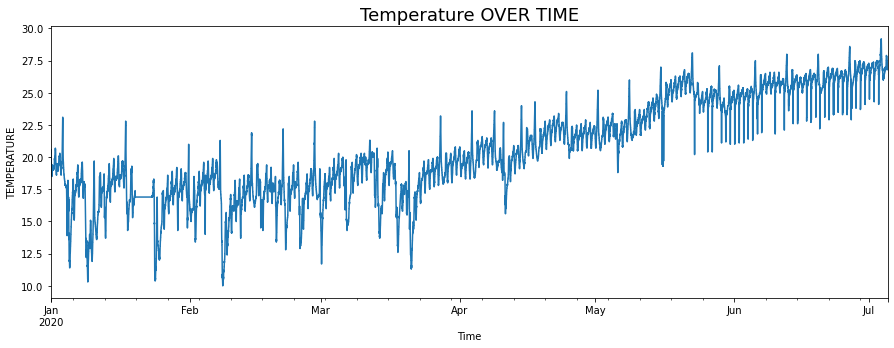

In [8]:
df = impute_nulls_with_time_interpolation(df, cols_to_plot, RESAMPLE)
plot_columns(df, cols_to_plot, RESAMPLE)

### Plot matrix profile

In [9]:
df = df.iloc[:1000]
df.shape

(1000, 8)

In [10]:
cols_for_matrix_profile = ['EC', 'PH', 'ORP', 'TEMPERATURE']
mps = create_matrix_profile_dictionary(df, cols_for_matrix_profile, m=WINDOW)

**Plot univariant matrix profiles**

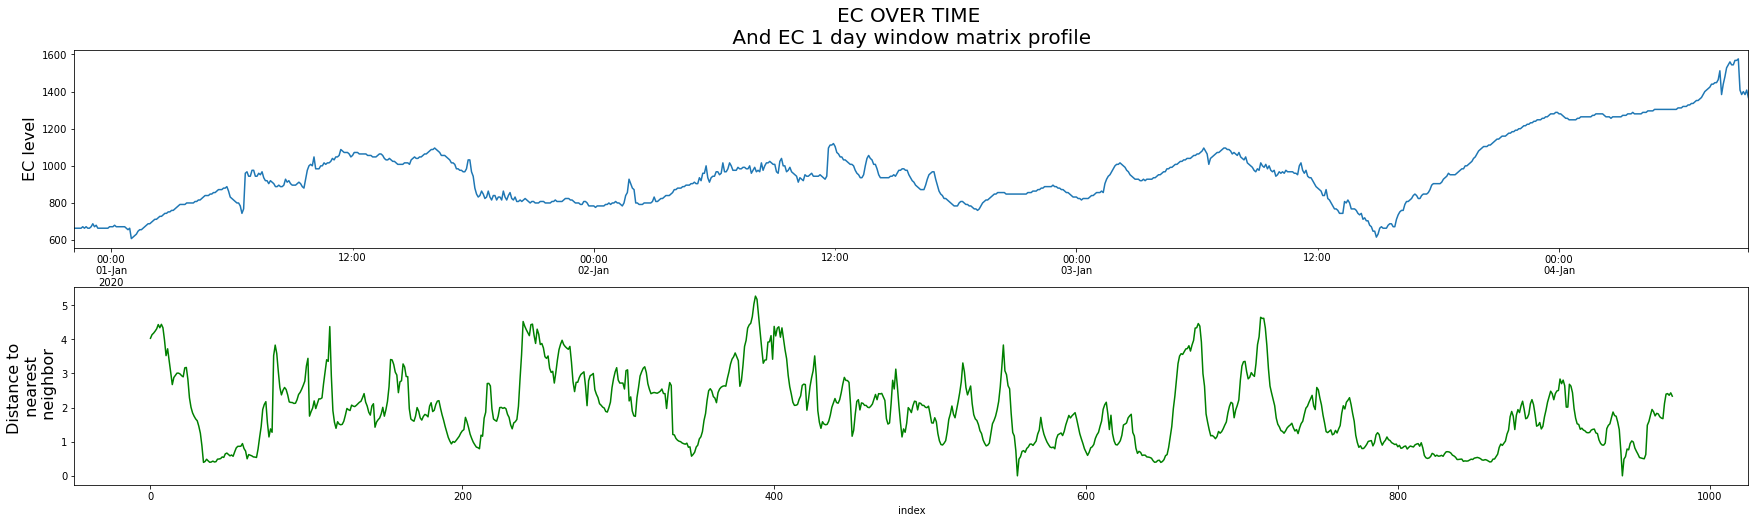

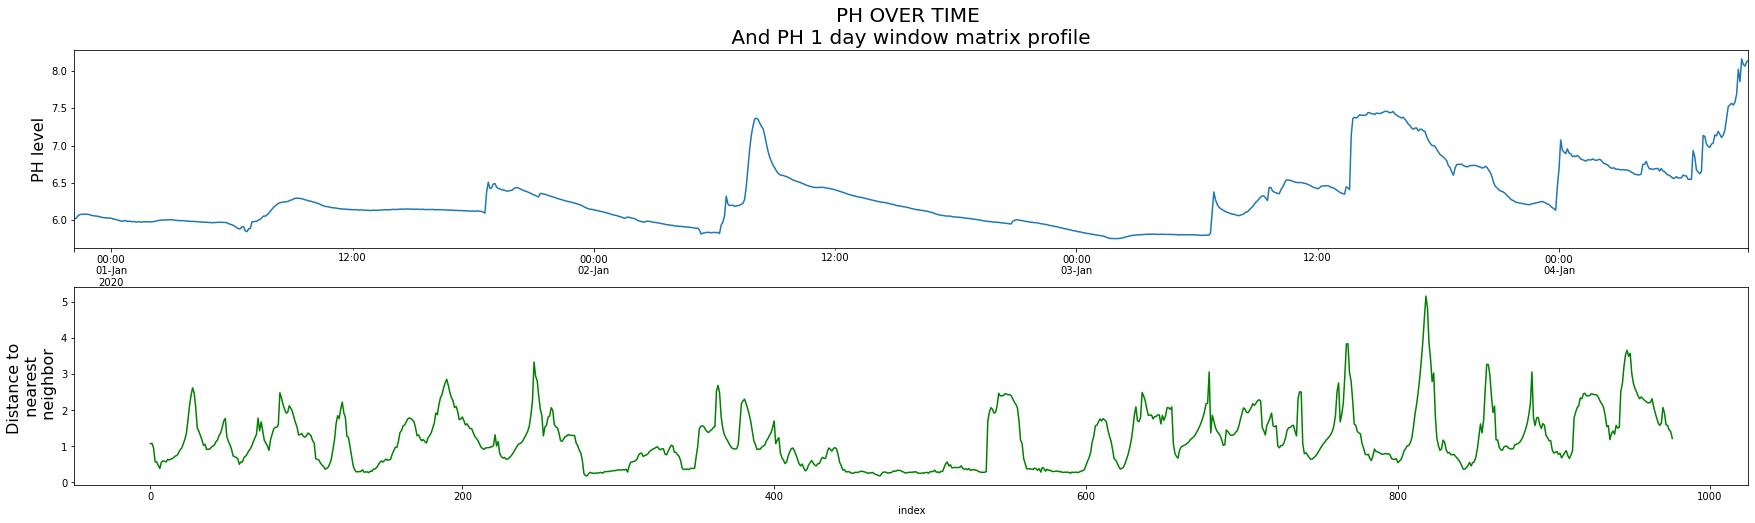

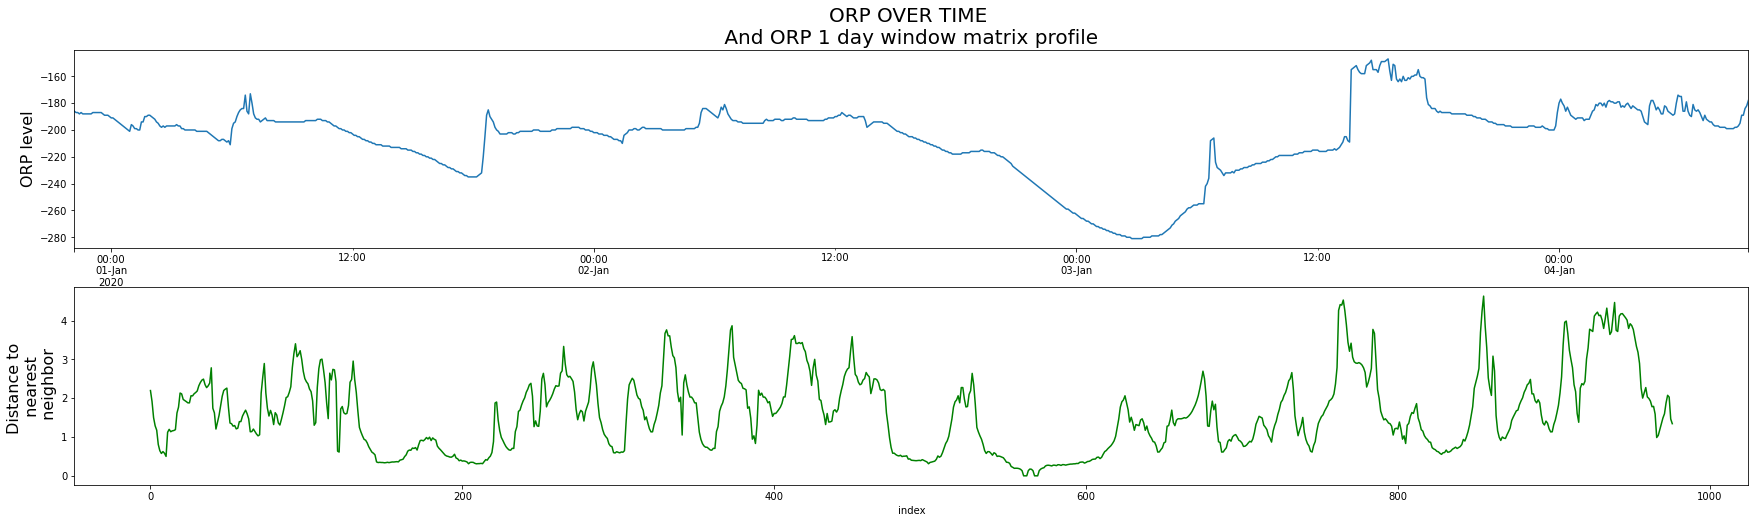

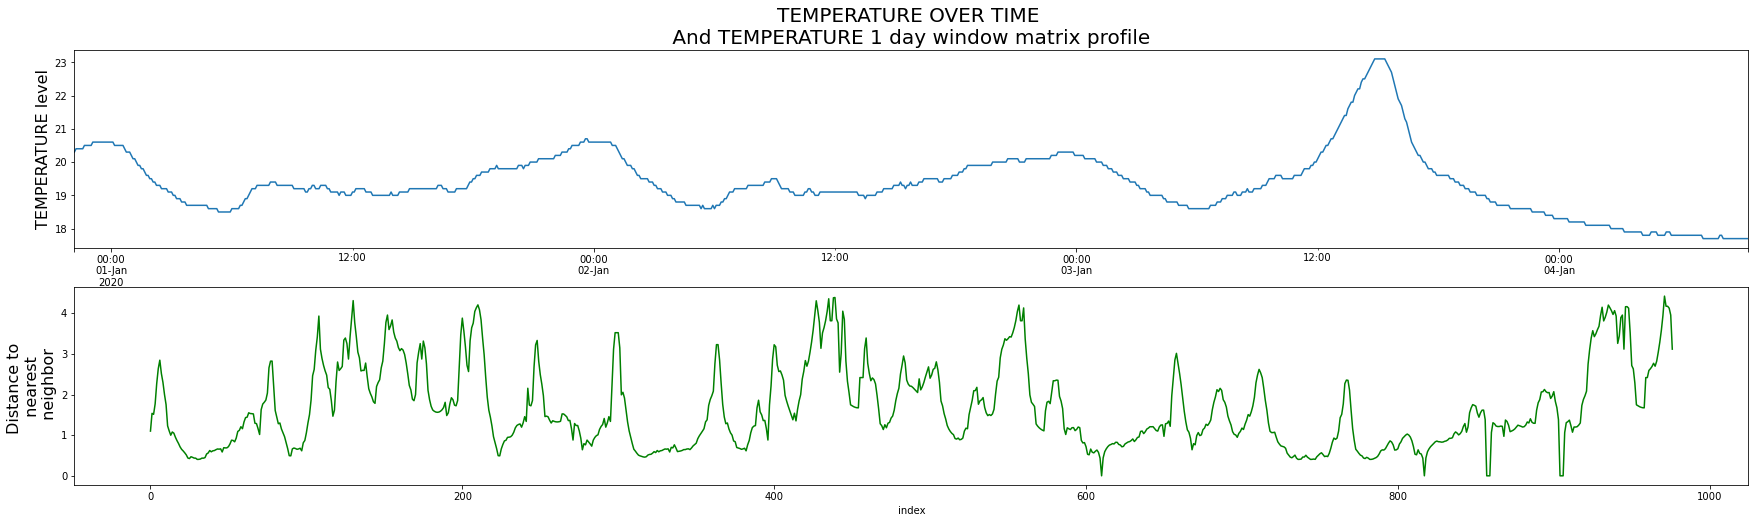

In [11]:
plot_univariant_matrix_profiles_dictionary(df, mps, cols_for_matrix_profile)

**Plot univariant matrix profiles and motifs**

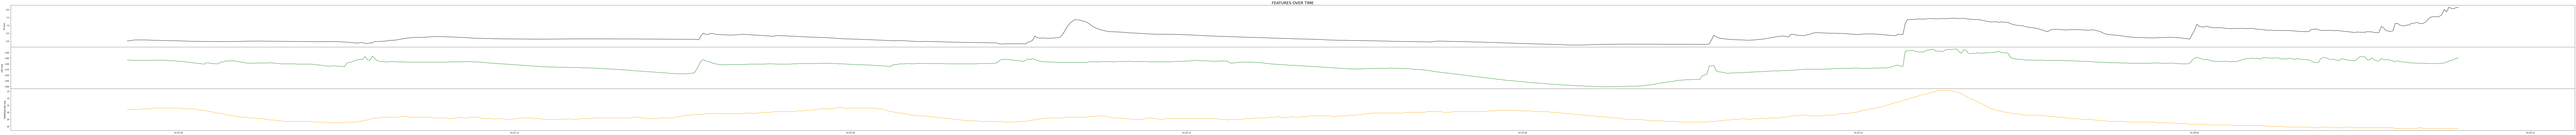

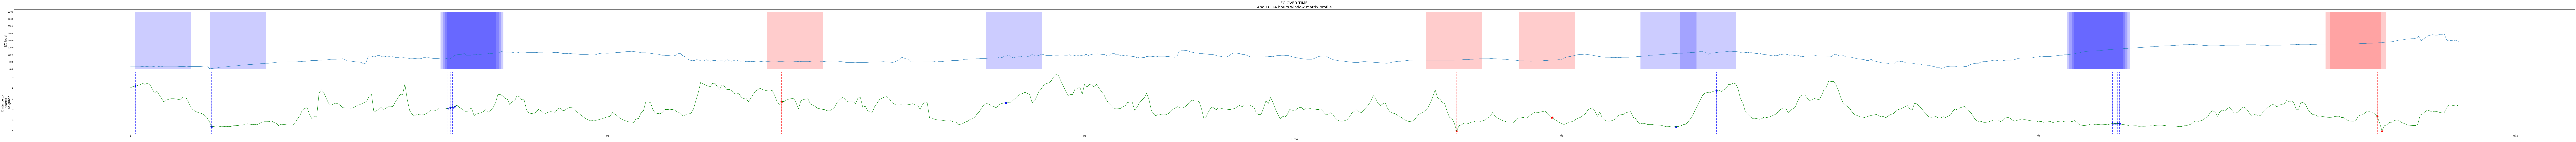

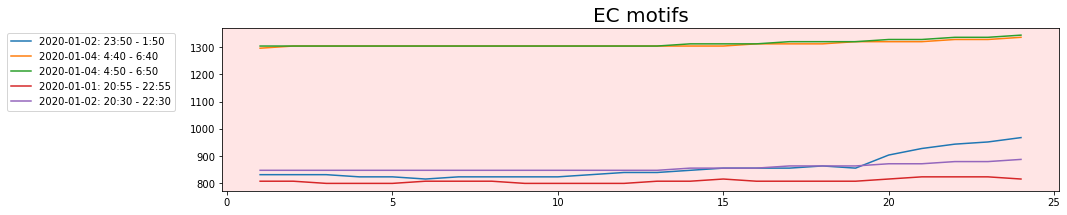

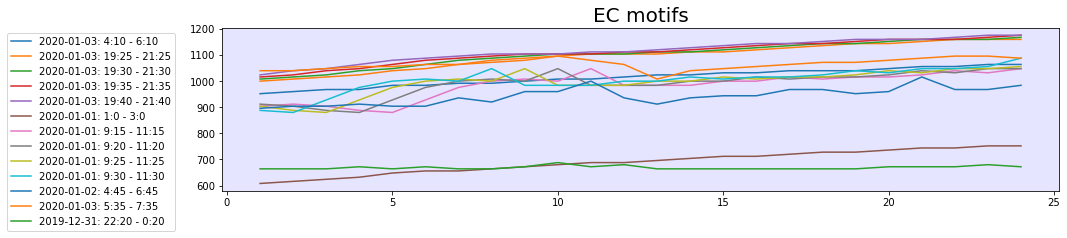

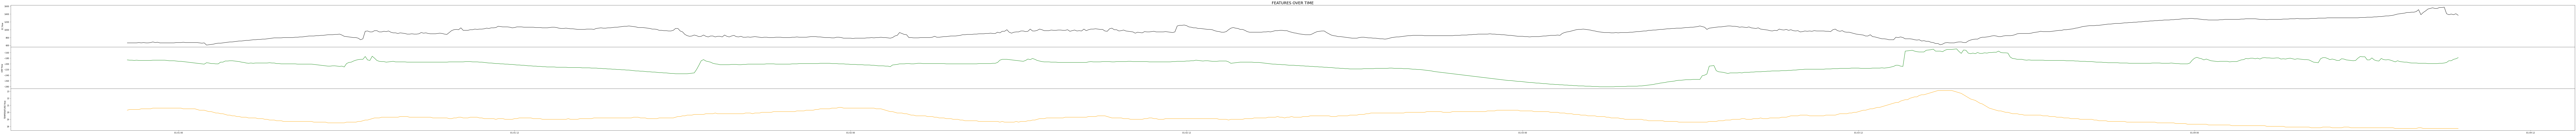

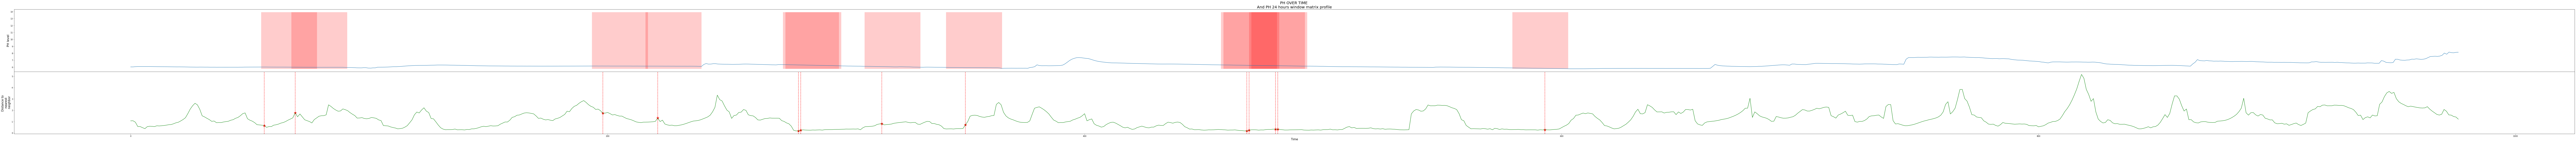

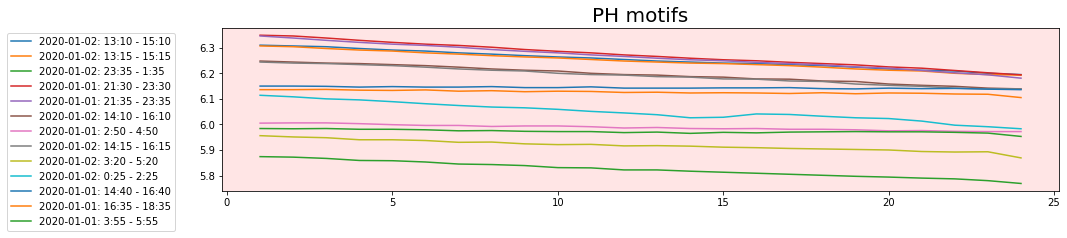

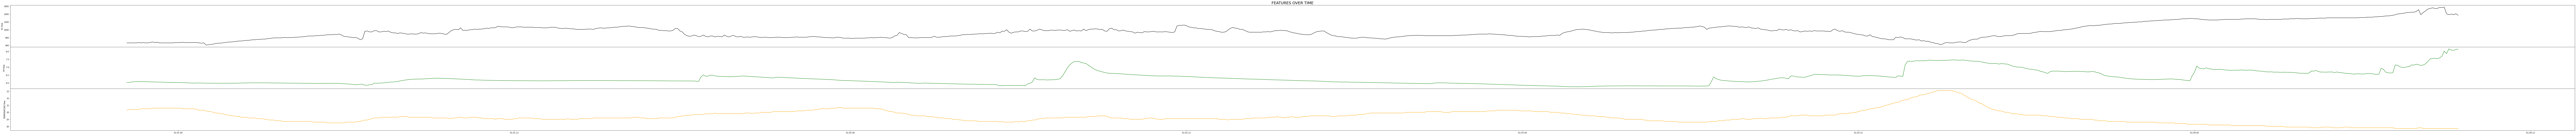

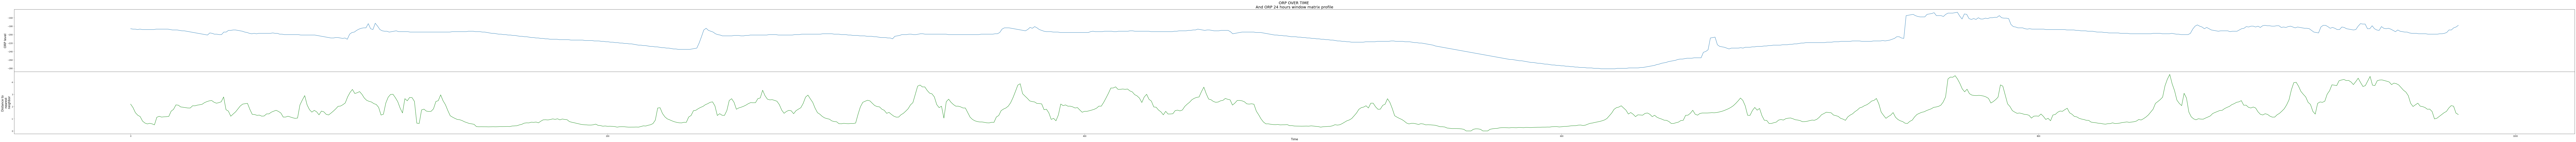

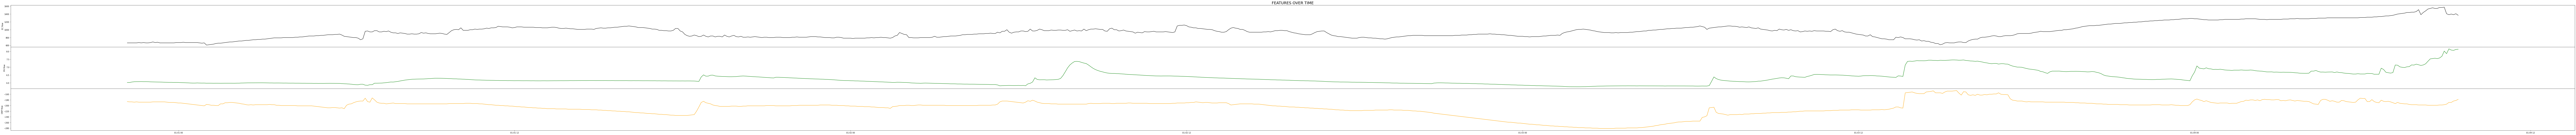

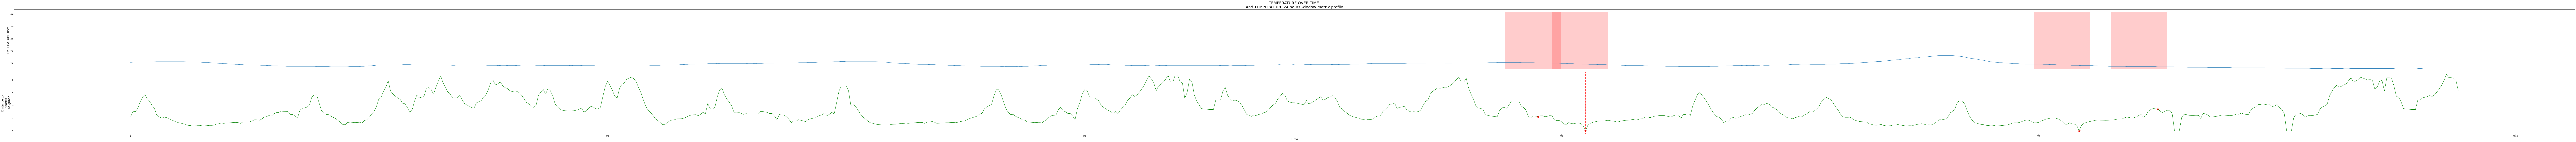

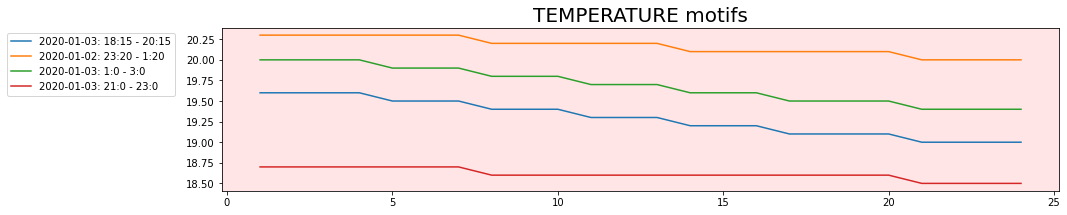

In [12]:
plot_univariant_matrix_profiles_and_motifs(df,
                                           mps,
                                           cols_for_matrix_profile,
                                           WINDOW,
                                           threshold=THRESHOLD)

**Plot univariant motifs**

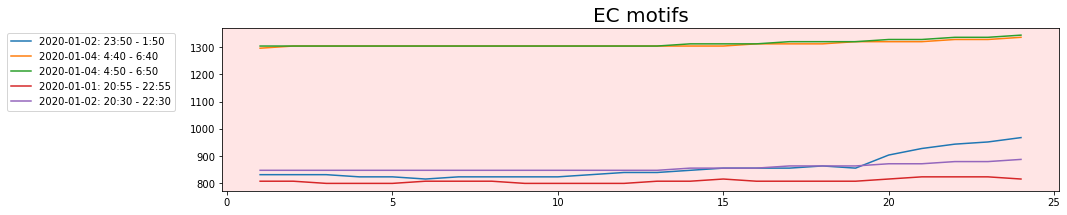

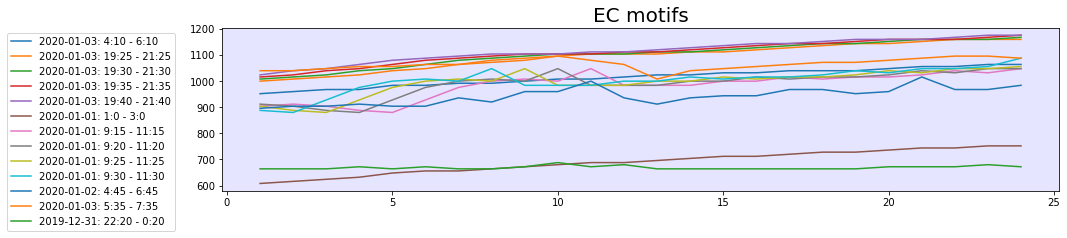

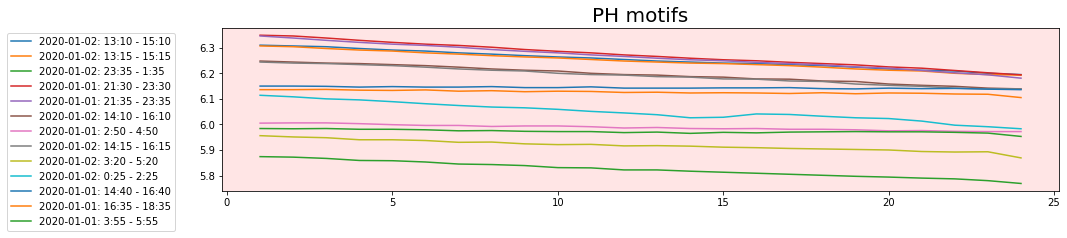

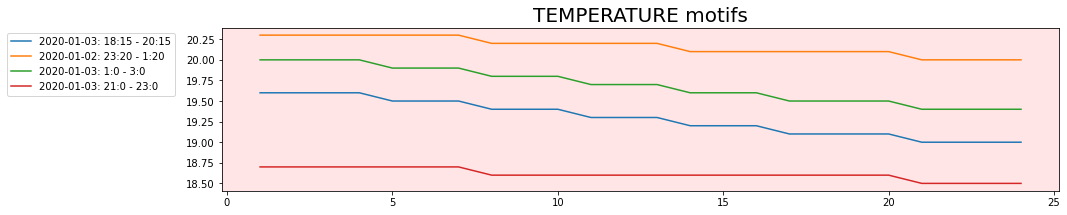

In [13]:
for col in cols_for_matrix_profile:
    groups = discover_motifs_groups(mps[f'mp_{col}'], THRESHOLD)
    plot_groups(df, groups, f'{col}', WINDOW)

**Plot multi variant matrix profiles**

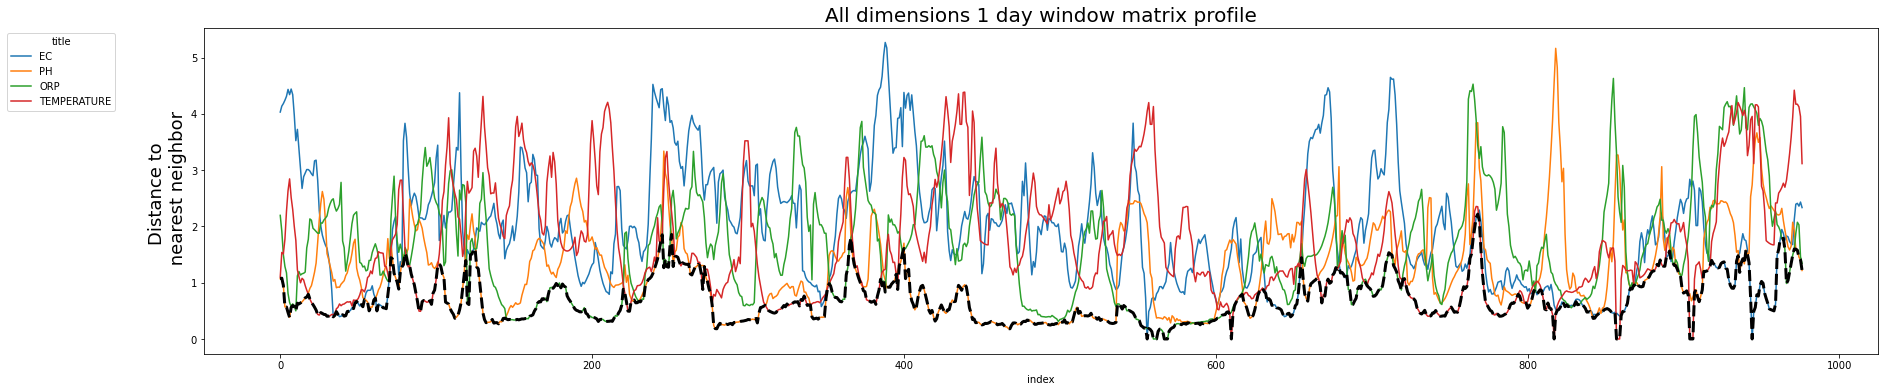

In [14]:
plot_multi_variant_matrix_profile(mps, cols_for_matrix_profile)